In [1]:
# Para visualización en notebook
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (8,6)
mpl.rcParams['font.size'] = 22
import seaborn as sns

# Números y Datos
import numpy as np
import pandas as pd

import networkx as nx

from glob import glob
from pathlib import Path

# Ejemplo para abrir datos TP2

In [2]:
filenames = glob('DataSujetos/*.csv')
df = pd.read_csv(filenames[0], header=-1)
n = df.shape[0]
df -= np.diag(np.ones(n))

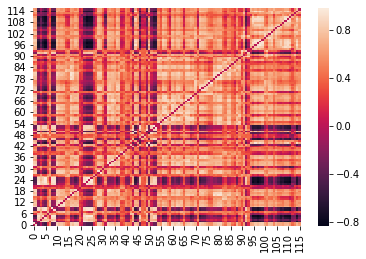

In [3]:
sns.heatmap(df);
plt.xlim(0,n)
plt.ylim(0,n);

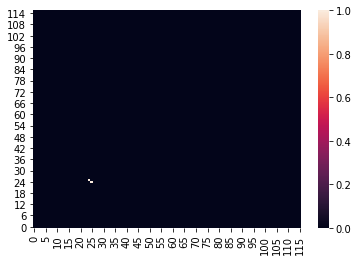

Name: 
Type: Graph
Number of nodes: 116
Number of edges: 1
Average degree:   0.0172


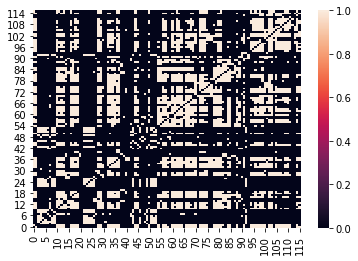

Name: 
Type: Graph
Number of nodes: 116
Number of edges: 2001
Average degree:  34.5000


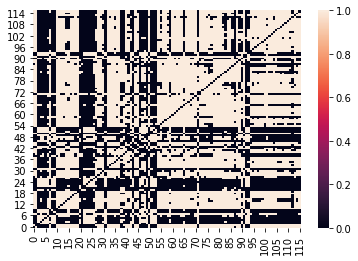

Name: 
Type: Graph
Number of nodes: 116
Number of edges: 4001
Average degree:  68.9828


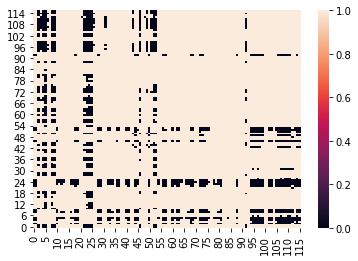

Name: 
Type: Graph
Number of nodes: 116
Number of edges: 6059
Average degree: 104.4655


In [4]:
sorted_corrs = sorted(df.values.flatten(),reverse=True)
for d in np.arange(0,n*n-1,4000):
    u = sorted_corrs[d]
    plt.figure()
    sns.heatmap(df>=u)
    plt.xlim(0,n)
    plt.ylim(0,n);
    plt.show()
    
    G = nx.from_pandas_adjacency(df>=u)
    print(nx.info(G))

Graficamos una propiedad como el coeficiente de clústering en función de la densidad de aristas

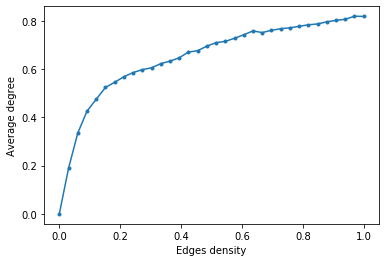

In [50]:
sort_corrs = sorted(df.values.flatten(),reverse=True)
avg_clustering = []
ds = np.arange(0,(n*n-n)//2,200)
for d in ds:
    u = sort_corrs[d]
    G = nx.from_pandas_adjacency(df>=u)
    avg_clustering_ = nx.average_clustering(G)
    avg_clustering.append(avg_clustering_)
    
plt.plot(ds/ds.max(),avg_clustering,'.-')
plt.xlabel('Edges density')
plt.ylabel('Average degree');

# Ejemplo abrir todos los sujetos para una condición y mostrar la curva promedio

Usamos una función para simplificar

In [7]:
def subjectmatrix2graphslist(filename, densities):
    """
    Toma un archivo csv con la matriz de input y devuelve una lista de grafos con la densisdad de aristas correspondiente
    """
    
    correlation_matrix = pd.read_csv(filename, header=-1)
    n = correlation_matrix.shape[0]
    max_links = (n*n-n)//2
    correlation_matrix -= np.diag(np.ones(n))
    sorted_correlations = sorted(correlation_matrix.values.flatten(),reverse=True)
    
    Gs = []
    for d in densities:
        idx = int(d*max_links)
        threshold = sorted_correlations[idx]
        Gs.append(nx.from_pandas_adjacency(correlation_matrix>=threshold))
        
    return Gs

In [8]:
!ls DataSujetos/

N1_suj10.csv  N1_suj7.csv   N2_suj4.csv   N3_suj1.csv  W_suj16.csv
N1_suj11.csv  N1_suj8.csv   N2_suj5.csv   N3_suj2.csv  W_suj17.csv
N1_suj12.csv  N1_suj9.csv   N2_suj6.csv   N3_suj3.csv  W_suj18.csv
N1_suj13.csv  N2_suj10.csv  N2_suj7.csv   N3_suj4.csv  W_suj1.csv
N1_suj14.csv  N2_suj11.csv  N2_suj8.csv   N3_suj5.csv  W_suj2.csv
N1_suj15.csv  N2_suj12.csv  N2_suj9.csv   N3_suj6.csv  W_suj3.csv
N1_suj16.csv  N2_suj13.csv  N3_suj10.csv  N3_suj7.csv  W_suj4.csv
N1_suj17.csv  N2_suj14.csv  N3_suj11.csv  N3_suj8.csv  W_suj5.csv
N1_suj18.csv  N2_suj15.csv  N3_suj12.csv  N3_suj9.csv  W_suj6.csv
N1_suj1.csv   N2_suj16.csv  N3_suj13.csv  W_suj10.csv  W_suj7.csv
N1_suj2.csv   N2_suj17.csv  N3_suj14.csv  W_suj11.csv  W_suj8.csv
N1_suj3.csv   N2_suj18.csv  N3_suj15.csv  W_suj12.csv  W_suj9.csv
N1_suj4.csv   N2_suj1.csv   N3_suj16.csv  W_suj13.csv
N1_suj5.csv   N2_suj2.csv   N3_suj17.csv  W_suj14.csv
N1_suj6.csv   N2_suj3.csv   N3_suj18.csv  W_suj15.csv


Lista de los archivos para la condición N1


In [31]:
filenames = glob('DataSujetos/N1_*.csv')

densities = np.linspace(0,0.4,10)
graphs = {}
for filename in filenames:
    Gs = subjectmatrix2graphslist(filename, densities)
    name = Path(filename).stem
    graphs[name] = Gs

Visualizamos 10 matrices de adyacencia de un sujeto


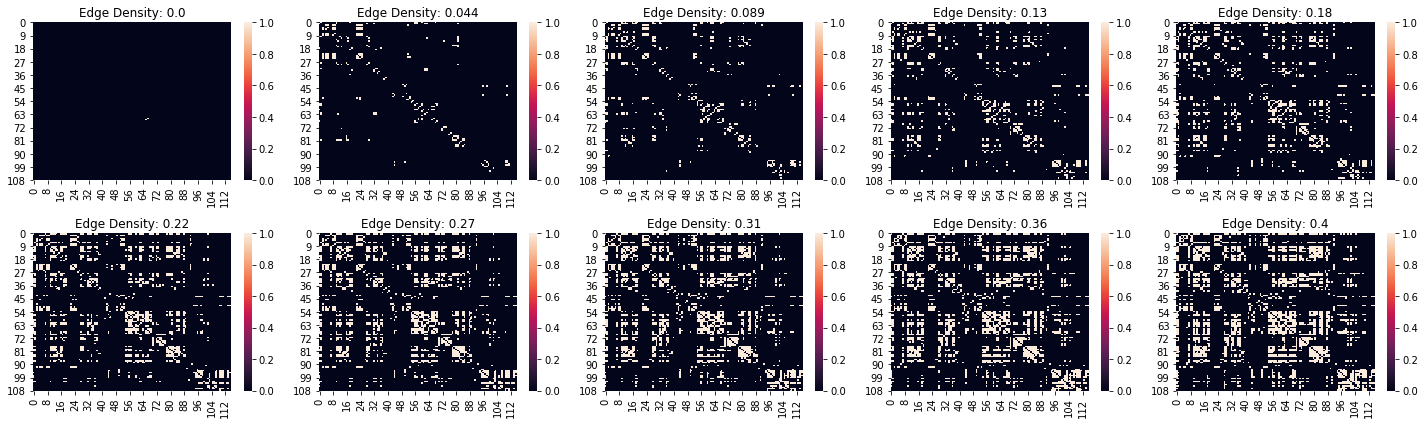

In [32]:
plt.figure(figsize=(20,6))
for i, G in enumerate(graphs['N1_suj2']):
    plt.subplot(2,5,i+1)
    sns.heatmap(nx.to_numpy_array(G))
    plt.title('Edge Density: {:0.2}'.format(densities[i]))
plt.tight_layout()

Calculamos alguna métrica de los grafos en función de la densidad de aistas para todos los sujetos

In [33]:
avg_clustering = []
for name, Gs in graphs.items():
    avg_clustering_ = [nx.average_clustering(G) for G in Gs]
    avg_clustering.append(avg_clustering_)
avg_clustering = np.vstack(avg_clustering)

Graficamos todo junto

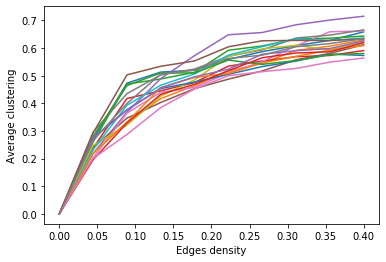

In [34]:
plt.plot(densities, avg_clustering.T);
plt.xlabel('Edges density')
plt.ylabel('Average clustering');

Graficamos promedios y desvíos con sombra o con barra de error

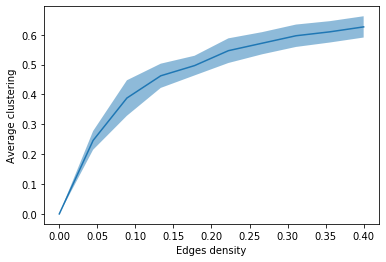

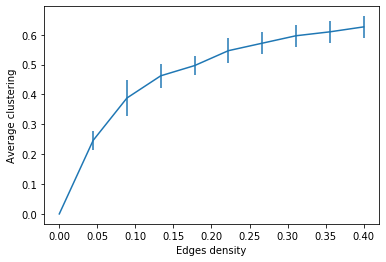

In [35]:
u = avg_clustering.mean(0)
s = avg_clustering.std(0)
plt.fill_between(densities,u-s,u+s, alpha=0.5);
plt.plot(densities, u);
plt.xlabel('Edges density')
plt.ylabel('Average clustering');

plt.figure()

plt.errorbar(densities,u,s);
plt.xlabel('Edges density')
plt.ylabel('Average clustering');